In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from enum import Enum

# Read data from CSV
df = pd.read_csv('../data/track_features.csv')
df

,name,artist,happiness,danceability,acousticness,mode,energy,tempo,loudness
0,Mr. Brightside,The Killers,24,35,0,major,91,148,-5 dB
1,Pyramid Song,Radiohead,7,12,79,minor,34,73,-8 dB
2,Black Hole Sun,Soundgarden,15,35,0,major,83,105,-5 dB
3,Should I Stay or Should I Go - Remastered,The Clash,82,74,8,major,84,113,-6 dB
4,Come Together - Remastered 2009,The Beatles,19,53,3,minor,38,165,-12 dB
5,Even Flow,Pearl Jam,27,39,0,minor,94,105,-7 dB
6,Paradise City,Guns N' Roses,39,27,2,major,98,100,-6 dB
7,Sweet Emotion,Aerosmith,49,38,0,major,76,99,-11 dB
8,Banana Pancakes,Jack Johnson,62,82,61,major,38,114,-8 dB
9,Let's Stay Together,Al Green,51,76,58,minor,40,102,-11 dB


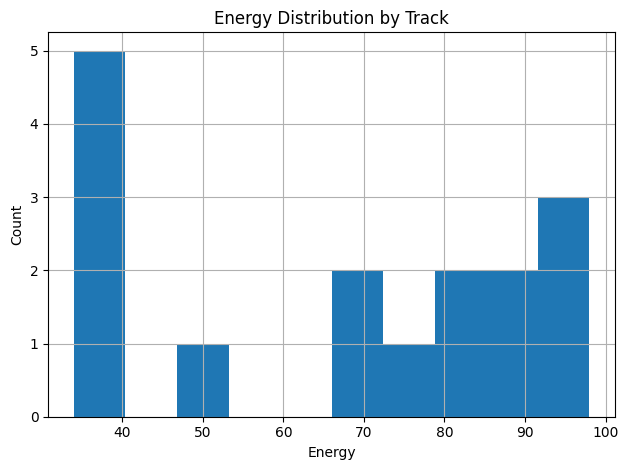

In [2]:
# Energy Histogram
ax2 = df['energy'].hist()
ax2.set_title('Energy Distribution by Track')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

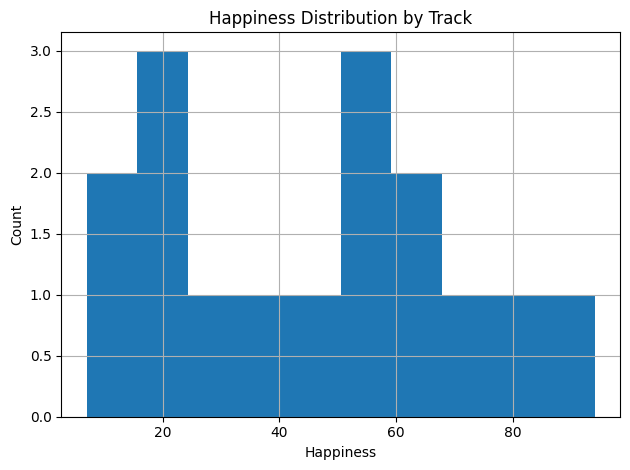

In [3]:
# Happiness Histogram
ax = df['happiness'].hist()
ax.set_title('Happiness Distribution by Track')
ax.set_xlabel('Happiness')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

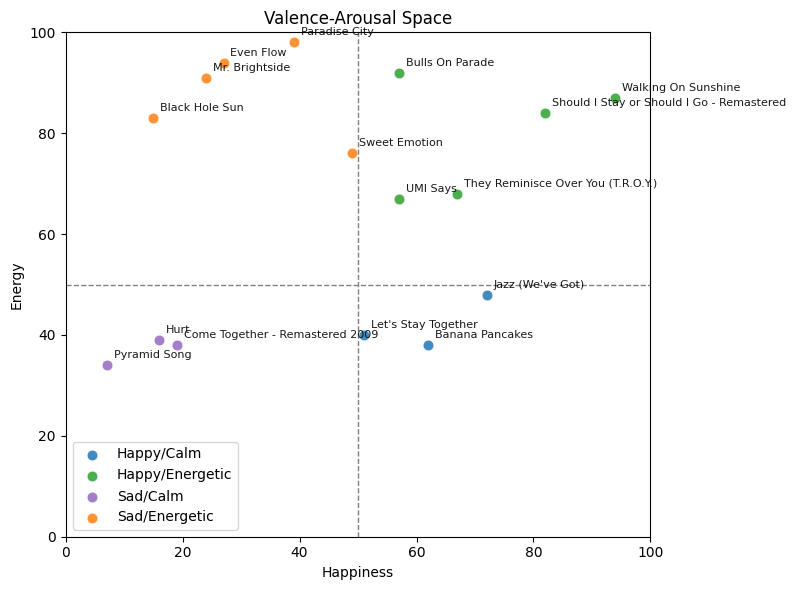

In [4]:
# Valence-Arousal Scatterplot
fig, ax3 = plt.subplots(figsize=(8, 6))

def classify_mood(row):
    if row['happiness'] >= 50 and row['energy'] >= 50:
        return 'Happy/Energetic'
    if row['happiness'] >= 50 and row['energy'] < 50:
        return 'Happy/Calm'
    if row['happiness'] < 50 and row['energy'] >= 50:
        return 'Sad/Energetic'
    if row['happiness'] < 50 and row['energy'] < 50:
        return 'Sad/Calm'

df['mood_quadrant'] = df.apply(classify_mood, axis=1)

legend_colors = {
    'Happy/Energetic': '#2ca02c',
    'Happy/Calm': '#1f77b4',
    'Sad/Energetic': '#ff7f0e',
    'Sad/Calm': '#9467bd'
}

for mood_label, mood_df in df.groupby('mood_quadrant'):
    ax3.scatter(mood_df['happiness'], mood_df['energy'], s=60, alpha=0.85, label=mood_label, c=legend_colors[mood_label], edgecolors='white', linewidths=0.6)

for _, row in df.iterrows():
    ax3.annotate(row['name'], (row['happiness'], row['energy']), textcoords='offset points', xytext=(5, 5), fontsize=8, alpha=0.9)

ax3.axvline(50, color='gray', linestyle='--', linewidth=1)
ax3.axhline(50, color='gray', linestyle='--', linewidth=1)
ax3.set_title('Valence-Arousal Space')
ax3.set_xlabel('Happiness')
ax3.set_ylabel('Energy')
ax3.set_xlim(0, 100)
ax3.set_ylim(0, 100)
ax3.legend()
plt.tight_layout()
plt.show()

In [5]:
# Manual Mood Labeling
class Mood(Enum):
    JOYFUL_EXCITED = "Joyful/Excited"
    PEACEFUL_RELAXED = "Peaceful/Relaxed"
    MELANCHOLY_REFLECTIVE = "Melancholy/Reflective"
    TENSE_AGGRESSIVE = "Tense/Aggressive"
    GROOVE_WARM = "Groove/Warm"

labels = {
    "Walking On Sunshine": Mood.JOYFUL_EXCITED.value,
    "Should I Stay or Should I Go - Remastered": Mood.JOYFUL_EXCITED.value,
    "Banana Pancakes": Mood.PEACEFUL_RELAXED.value,
    "Let's Stay Together": Mood.PEACEFUL_RELAXED.value,
    "Hurt": Mood.MELANCHOLY_REFLECTIVE.value,
    "Pyramid Song": Mood.MELANCHOLY_REFLECTIVE.value,
    "Black Hole Sun": Mood.MELANCHOLY_REFLECTIVE.value,
    "Come Together - Remastered 2009": Mood.MELANCHOLY_REFLECTIVE.value,
    "Even Flow": Mood.TENSE_AGGRESSIVE.value,
    "Paradise City": Mood.TENSE_AGGRESSIVE.value,
    "Mr. Brightside": Mood.TENSE_AGGRESSIVE.value,
    "Bulls On Parade": Mood.TENSE_AGGRESSIVE.value,
    "Sweet Emotion": Mood.GROOVE_WARM.value,
    "UMI Says": Mood.GROOVE_WARM.value,
    "Jazz (We've Got)": Mood.GROOVE_WARM.value,
    "They Reminisce Over You (T.R.O.Y.)": Mood.GROOVE_WARM.value,
}

df["mood_label"] = df["name"].map(labels)
df[['name', 'artist', 'mood_label']]

,name,artist,mood_label
0,Mr. Brightside,The Killers,Tense/Aggressive
1,Pyramid Song,Radiohead,Melancholy/Reflective
2,Black Hole Sun,Soundgarden,Melancholy/Reflective
3,Should I Stay or Should I Go - Remastered,The Clash,Joyful/Excited
4,Come Together - Remastered 2009,The Beatles,Melancholy/Reflective
5,Even Flow,Pearl Jam,Tense/Aggressive
6,Paradise City,Guns N' Roses,Tense/Aggressive
7,Sweet Emotion,Aerosmith,Groove/Warm
8,Banana Pancakes,Jack Johnson,Peaceful/Relaxed
9,Let's Stay Together,Al Green,Peaceful/Relaxed


In [6]:
# Predictive Method

# Convert loudness to float
df["loudness_num"] = pd.to_numeric(df["loudness"].str.removesuffix(" dB"))

# Convert mode to binary
df["mode_bin"] = (df["mode"] == "major").astype(int)

# Create feature matrix and target vector
X = df[["happiness","energy","danceability","acousticness","tempo","loudness_num","mode_bin"]]
y = df["mood_label"]

# Create stratified train/test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.375, random_state=42)
train_idx, test_idx = next(sss.split(X, y))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]